In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../Data/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,NaN,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         880 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name            11
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df=df.drop(columns=["Cabin"])

In [9]:
df["Name"]=df["Name"].fillna("Unknown")

<AxesSubplot:xlabel='Age'>

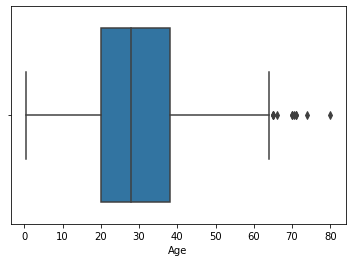

In [13]:
sns.boxplot(x="Age",data=df)

#### Filling missing values of age with median because there is presence of outliers in age column

In [14]:
df["Age"].median()

28.0

In [15]:
df["Age"]=df["Age"].fillna(df["Age"].median())

#### For missing values in Embark we are using Mode

In [16]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

#### Missing Data count after cleaning

In [17]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Sex (Gender analysis of passengers)

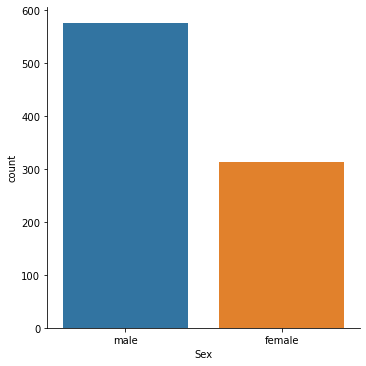

In [19]:
sns.catplot(x="Sex",data=df,kind="count")

#### Conclusion: The count of male passenger is greater than female passengers

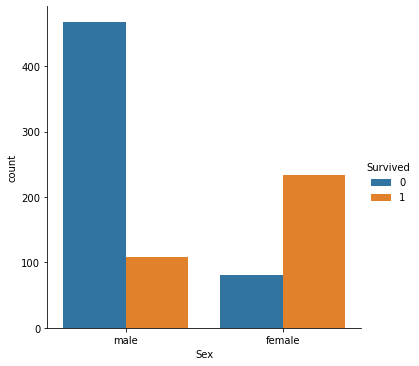

In [20]:
sns.catplot(x="Sex",data=df,kind="count",hue="Survived")

#### Conclusion: Compared to females , male death rate is higher

## Pclass

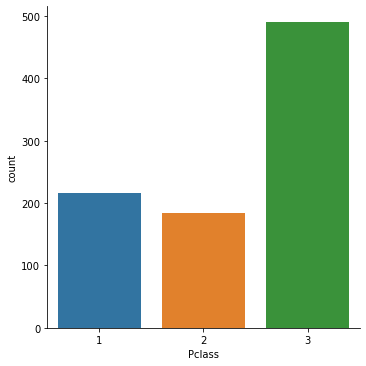

In [23]:
sns.catplot(x="Pclass",data=df,kind="count")

#### conclusion : In the ship majority passengers had  3 class ticket

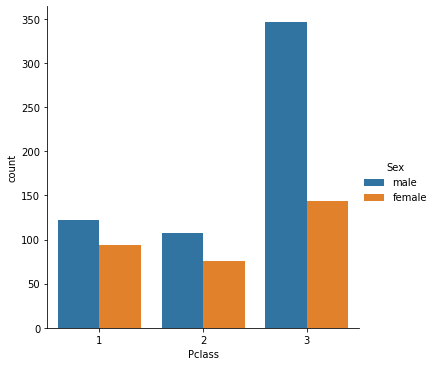

In [24]:
sns.catplot(x="Pclass",data=df,kind="count",hue="Sex")

#### conclusion : there are more number of male passenger in the Passenger class 3 

In [35]:
def checkAge(age):
    if age >16 and age <50:
        return "Adult"
    elif age > 50:
        return "Elder"
    elif age<=16:
        return "child"

In [36]:
df["age_type"]=df["Age"].apply(checkAge)

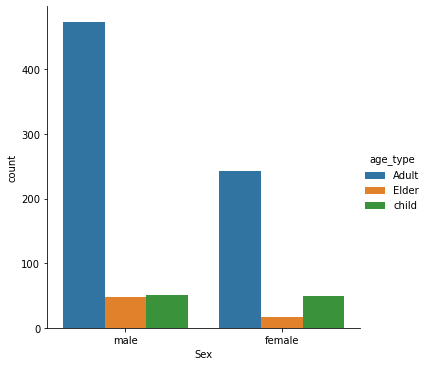

In [38]:
sns.catplot(x="Sex",data=df,hue="age_type",kind="count")

#### conclusion : There is more passengers from age group 16 to 50 than childerns and elder passengers

## Embarked

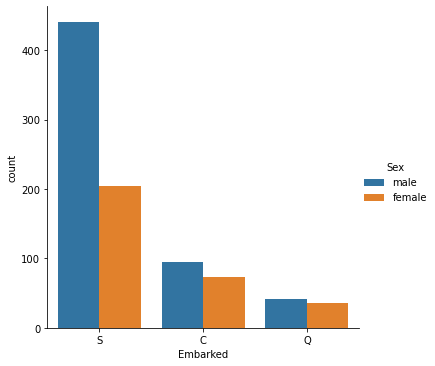

In [39]:
sns.catplot(x="Embarked",data=df,hue="Sex",kind="count")

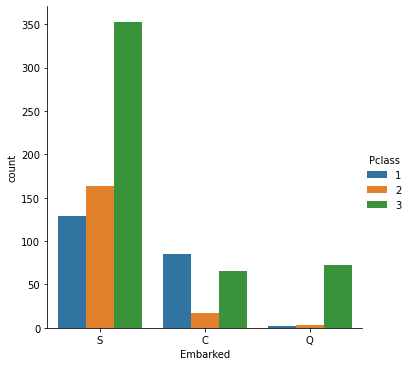

In [40]:
sns.catplot(x="Embarked",data=df,hue="Pclass",kind="count")

In [42]:
df["checkFamily"]=df["Parch"]+df["SibSp"]
df["checkFamily"].head()

0    1
1    1
2    0
3    1
4    0
Name: checkFamily, dtype: int64

In [43]:
def checkFam(val):
    if val>0:
        return "With Family"
    else:
        return "Without Family"

In [44]:
df["Family"]=df["checkFamily"].apply(checkFam)
df["Family"].head()

0       With Family
1       With Family
2    Without Family
3       With Family
4    Without Family
Name: Family, dtype: object

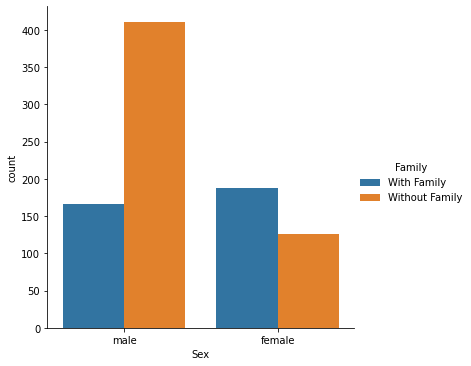

In [45]:
sns.catplot(x="Sex",data=df,hue="Family",kind="count")

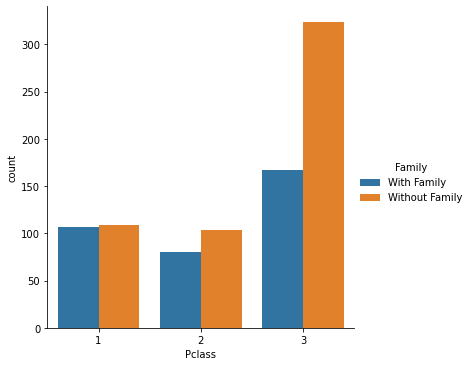

In [46]:
sns.catplot(x="Pclass",data=df,hue="Family",kind="count")

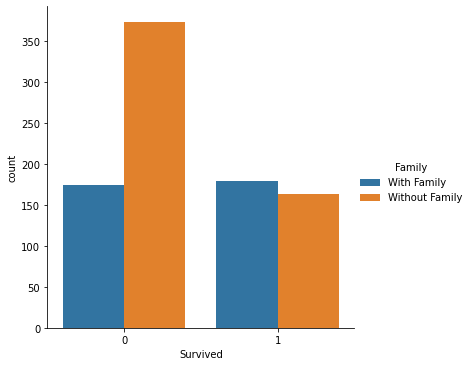

In [47]:
sns.catplot(x="Survived",data=df,hue="Family",kind="count")

<AxesSubplot:xlabel='Age', ylabel='Count'>

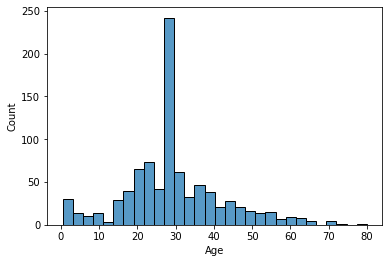

In [50]:
sns.histplot(x="Age",data=df)